In [1]:
#Stephen Cheney
#Homework 8

In [2]:
!pip install git+https://github.com/copasi/basico.git
from basico import *

  Cloning https://github.com/copasi/basico.git to /tmp/pip-req-build-c3pzoyqf
  Running command git clone --filter=blob:none --quiet https://github.com/copasi/basico.git /tmp/pip-req-build-c3pzoyqf
  Resolved https://github.com/copasi/basico.git to commit 2bfe0f092b0229f084df976fad17fd76d17d70f6
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 7.7 MB/s eta 0:00:00
  Created wheel for copasi-basico: filename=copasi_basico-0.52+3.g2bfe0f0-py3-none-any.whl size=179043 sha256=ea5a2f3ae7459d0b13a3574e785e829d6fae05e225a65e6e068c3a4477b16325
  Stored in directory: /tmp/pip-ephem-wheel-cache-99e_5sbv/wheels/bc/32/95/599e855807215d4295bba0dec6e5726554c7ff13ec97bd0544
Successfully built copasi-basico


In [3]:
import matplotlib.pyplot as plt

mymodel=load_biomodel(5) # load BIOMD0000000005 into mymodel

In [4]:
# the below just shows that the model is not framed in terms of "reactions"
allreactions = get_reactions()
print(allreactions) # display all reactions

##### Question 2 #####
# rxn 6: cdc2 kinase triggered degration of cyclin

##### Question 3 #####
# rxn 8: cdc2k phosphorylation
# rxn 9: cdc2k dephosphorylation

# rxn 8 rate: k = 1000000.000  <--- Winner by a factor of 1000
# rxn 9 rate: k =    1000.000

allreactionparams = get_reaction_parameters()
print(allreactionparams) # display all reaction parameters

                                                                                  scheme  \
name                                                                                       
cyclin_cdc2k dissociation                              p-cyclin_cdc2 -> cdc2k + p-cyclin   
cdc2k phosphorylation                                                   cdc2k -> cdc2k-P   
cdc2k dephosphorylation                                                 cdc2k-P -> cdc2k   
cyclin cdc2k-p association                           cdc2k-P + cyclin -> p-cyclin_cdc2-p   
deactivation of cdc2 kinase                             p-cyclin_cdc2 -> p-cyclin_cdc2-p   
cyclin biosynthesis                                                   EmptySet -> cyclin   
default degradation of cyclin                                         cyclin -> EmptySet   
cdc2 kinase triggered degration of cyclin                           p-cyclin -> EmptySet   
activation of cdc2 kinase                  p-cyclin_cdc2-p -> p-cyclin_cdc2;  to

In [5]:
# show the species and parameters of the model
allparams = get_parameters()
print(allparams)
allspecies = get_species()
print(allspecies)
print("")
print(allspecies.columns.tolist()) # allows us to see all 12 columns

None
                compartment        type   unit  initial_concentration  \
name                                                                    
EmptySet               cell       fixed  mol/l                   0.00   
cdc2k                  cell   reactions  mol/l                   0.00   
cdc2k-P                cell   reactions  mol/l                   0.75   
p-cyclin_cdc2          cell   reactions  mol/l                   0.00   
p-cyclin_cdc2-p        cell   reactions  mol/l                   0.25   
cyclin                 cell   reactions  mol/l                   0.00   
p-cyclin               cell   reactions  mol/l                   0.00   
total_cyclin           cell  assignment  mol/l                   0.25   
total_cdc2             cell  assignment  mol/l                   1.00   

                 initial_particle_number initial_expression  \
name                                                          
EmptySet                    0.000000e+00                      
cd

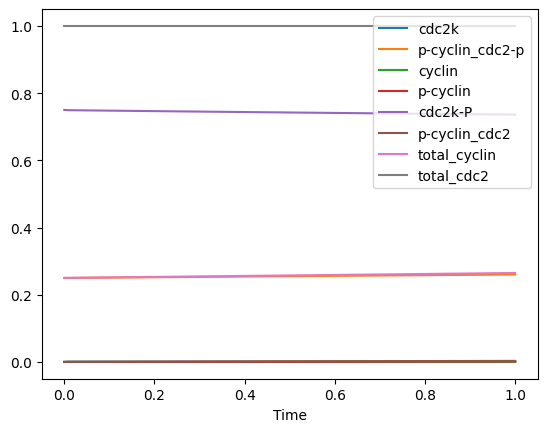

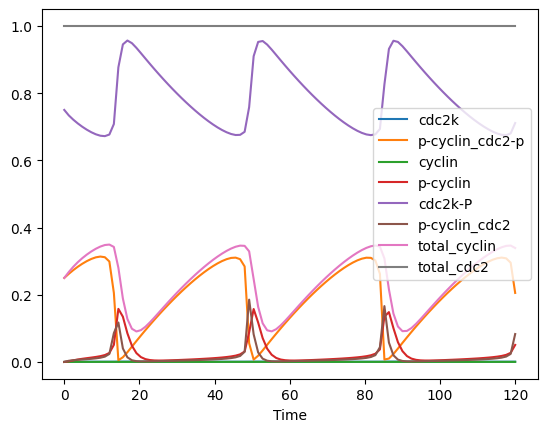

In [6]:
#default run times
result = run_time_course()
result.plot();

#adjusted run times to get 3 cell cycles
result1 = run_time_course(duration=120)
result1.plot();

##### Question 5 #####
# Approximate length is 35-40 minutes

##### Question 6 #####
# deactivation of cdc2 kinase

Cycle time is approximately 36.0 minutes


<function matplotlib.pyplot.show(close=None, block=None)>

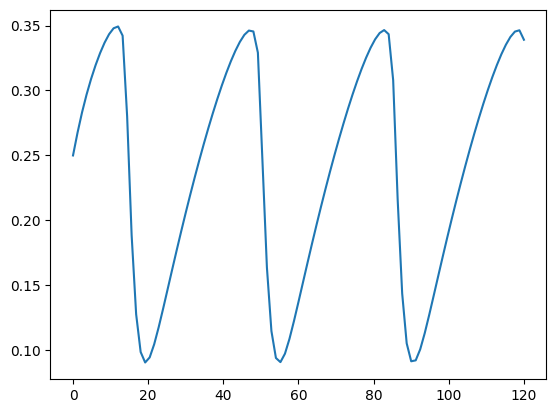

In [8]:
import numpy as np

##### Question 5 #####
# Approximate length is 36 minutes

result1 = run_time_course(duration=120)
#print(result1)

x = result1.index
y = result1['total_cyclin']
#print("")
#print(y.tolist())
#print("")
plt.plot(x,y)
ymax = max(y) # maximum value to use for threshold comparison
threshlow = 0.346 # must be over this value to match
threshhigh = 0.349

# within the treshhold, find the peaks to compare the cycle
indicies = [i for i, value in enumerate(y.tolist()) if value >= threshlow and value < threshhigh]
maxtimes = [] # holds the times of the max values

#print(indicies)
for j in range(len(indicies)):
  maxtimes.append(x[indicies[j]]) # add all time values of the max

#print(maxtimes)

cycle_t = maxtimes[1] - maxtimes[0] #calculate the cycle time
print('Cycle time is approximately', str(cycle_t), 'minutes' )

plt.show

Concentration: 0
Concentration: 0.2
Concentration: 0.4
Concentration: 0.6
Concentration: 0.8
Concentration: 1.0


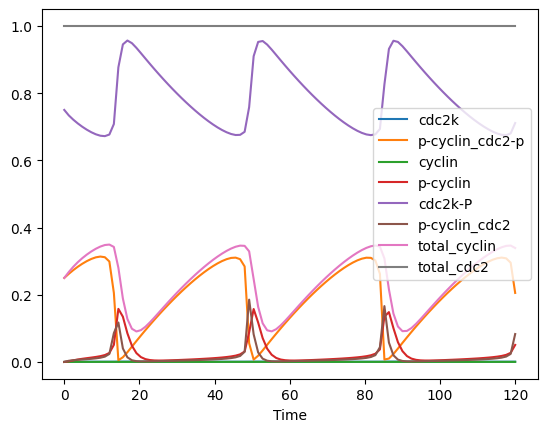

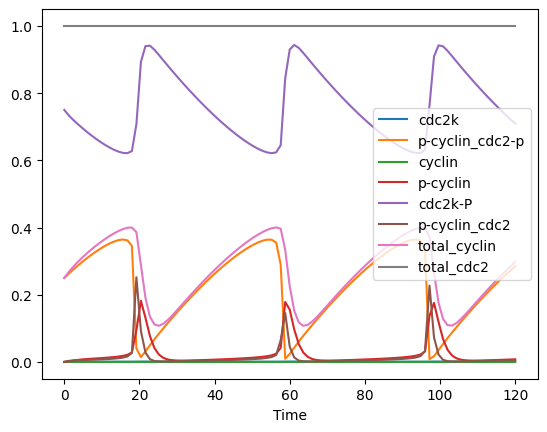

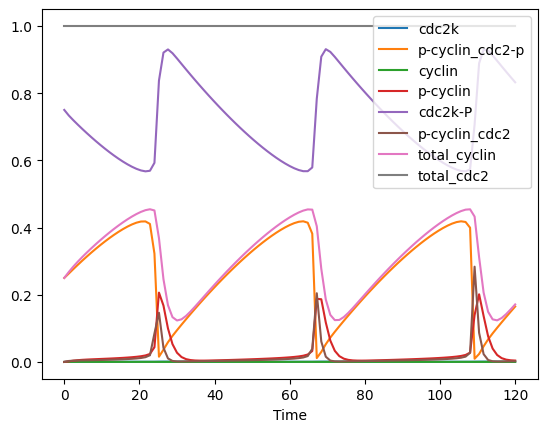

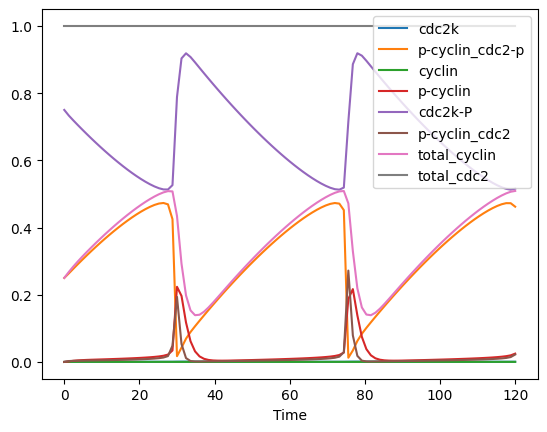

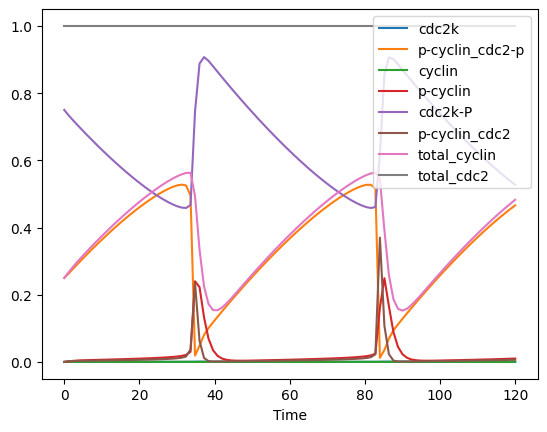

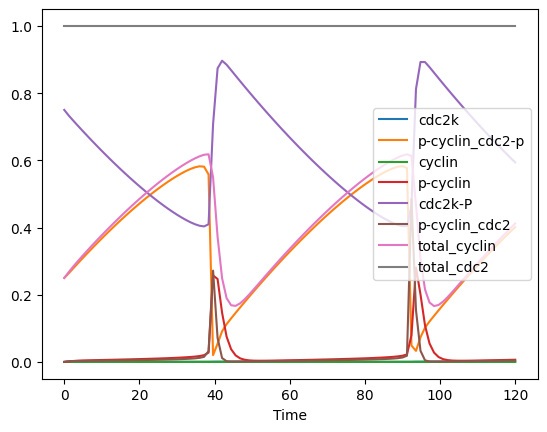

In [9]:
set_reaction_parameters(name= '(deactivation of cdc2 kinase).k1', value = 0) # ensure k is at initial value of 0
get_reaction_parameters('(deactivation of cdc2 kinase).k1') # print reaction param

dock1 = 0 # rate constant value
for i in range(6):
  print("Concentration:",round(dock1,2))
  set_reaction_parameters(name= '(deactivation of cdc2 kinase).k1', value = dock1) # set the k value
  dock1 += 0.2 # increment by 0.2
  result = run_time_course(duration=120)
  result.plot();

##### Question 7 #####
# The cell cycle lengthens each time you incease the parameter. This is most likely
# because the activation of MPF needs more and more synthesis due to the increasing inhibition
# of the deactivating kinase

Concentration: 0
Concentration: 0.2
Concentration: 0.4
Concentration: 0.6
Concentration: 0.8
Concentration: 1.0


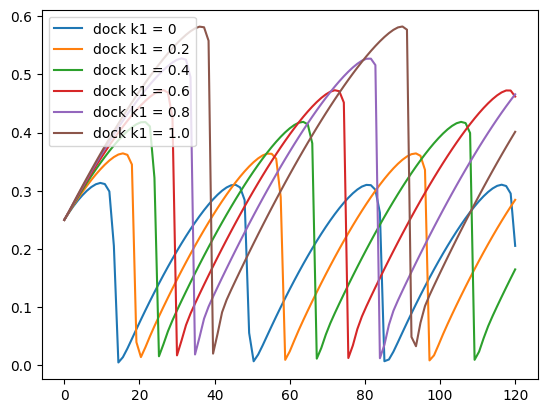

In [10]:
set_reaction_parameters(name= '(deactivation of cdc2 kinase).k1', value = 0) # ensure k is at initial value of 0
get_reaction_parameters('(deactivation of cdc2 kinase).k1') # print reaction param

dock1 = 0 # rate constant value
for i in range(6):
  print("Concentration:",round(dock1,2))
  set_reaction_parameters(name= '(deactivation of cdc2 kinase).k1', value = dock1) # set the k value
  result = run_time_course(duration=120)
  x = result.index # get time values
  y = result['p-cyclin_cdc2-p'] # get k1 values
  plt.plot(x,y, label = 'dock k1 = ' + str(round(dock1,2))) #plot
  plt.legend(loc = 'upper left')
  dock1 += 0.2 # increment by 0.2